In [38]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

plt.style.use('seaborn')

In [39]:
df = pd.read_csv("car data.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


**Data Visualization and Cleaning**

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [41]:
df.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

no null values 

In [42]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [43]:
#drop the non predictive columns
df.drop(columns=['Car_Name'], inplace=True)


array([[<AxesSubplot:title={'center':'Kms_Driven'}>,
        <AxesSubplot:title={'center':'Present_Price'}>],
       [<AxesSubplot:title={'center':'Selling_Price'}>,
        <AxesSubplot:title={'center':'Year'}>]], dtype=object)

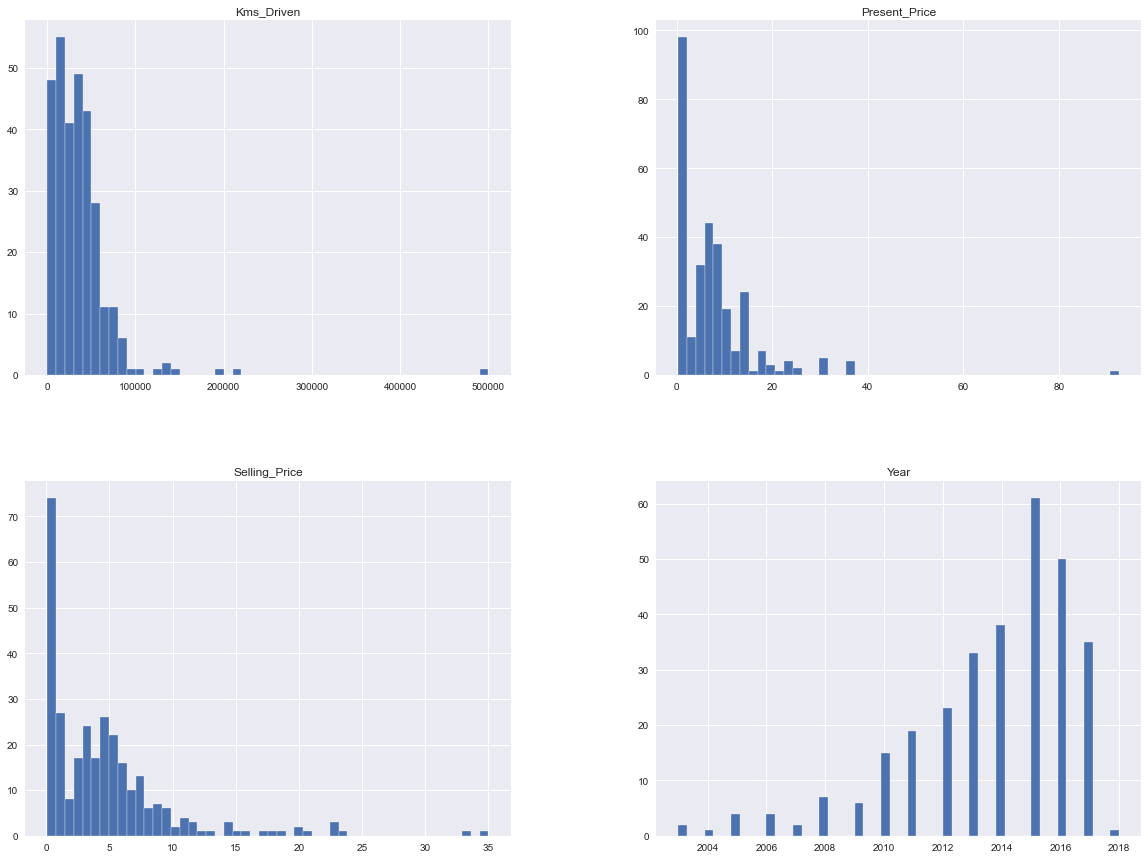

In [44]:
#histograms for numeric variables
atttibutes_hist = df[["Kms_Driven", "Present_Price", "Selling_Price", "Year"]].hist(bins=50, figsize=(20,15))
atttibutes_hist

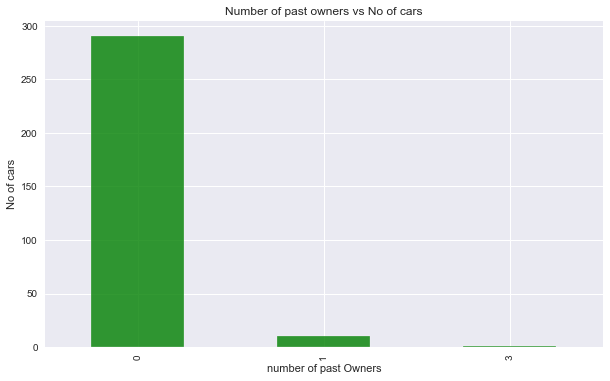

In [45]:
# no of previous owners for the cars sold
df['Owner'].value_counts().plot(kind='bar',figsize=(10,6),color='green',alpha=0.8)
plt.xlabel('number of past Owners')
plt.ylabel('No of cars')
plt.title('Number of past owners vs No of cars')
plt.show()

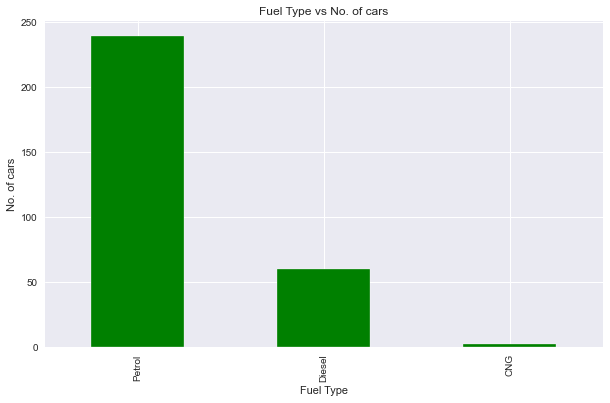

In [46]:
# types of fuel used by cars
df['Fuel_Type'].value_counts().plot(kind='bar', figsize=(10,6), color='green')
plt.xlabel("Fuel Type")
plt.ylabel("No. of cars")
plt.title("Fuel Type vs No. of cars")
plt.show()


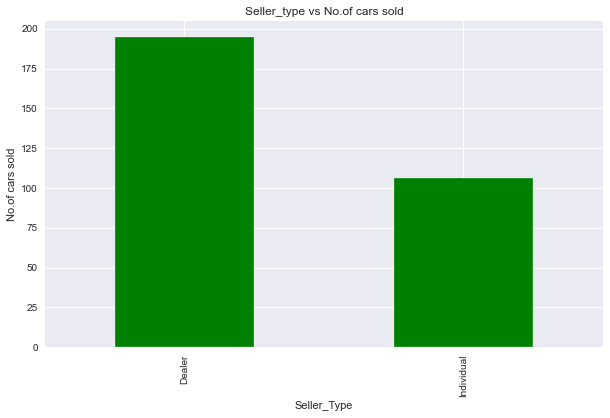

In [47]:
# types of seller
df['Seller_Type'].value_counts().plot(kind='bar', figsize=(10, 6),color = 'green')
plt.xlabel("Seller_Type")
plt.ylabel("No.of cars sold")
plt.title("Seller_type vs No.of cars sold")
plt.show()

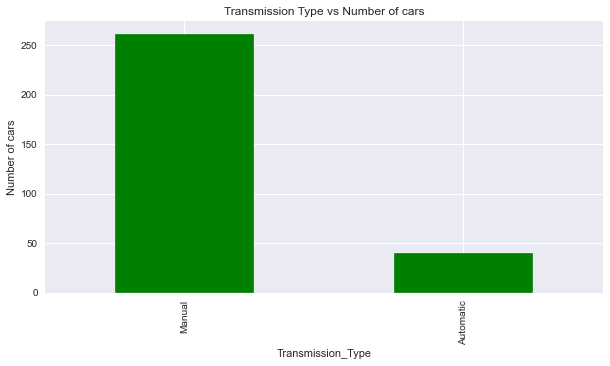

In [48]:
# type of Transmission
# 0 - Manual
# 1 - Automatic

df['Transmission'].value_counts().plot(kind='bar',figsize=(10,5),color='green')
plt.xlabel('Transmission_Type')
plt.ylabel('Number of cars')
plt.title('Transmission Type vs Number of cars')
plt.show()



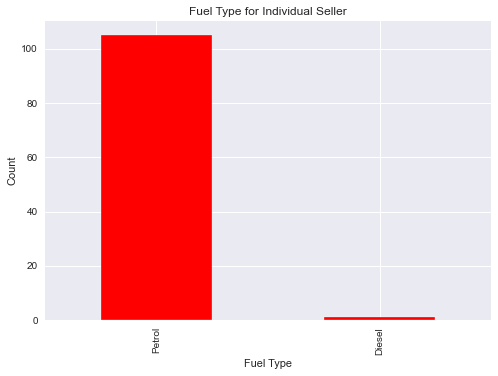

In [49]:


df['Fuel_Type'][df['Seller_Type']=='Individual'].value_counts().plot(kind='bar',color='red')
plt.title('Fuel Type for Individual Seller')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()



Individual sellers rarely Diesel fuelled cars.

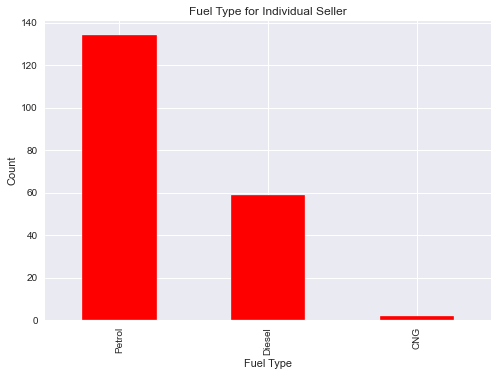

In [50]:
df['Fuel_Type'][df['Seller_Type']=='Dealer'].value_counts().plot(kind='bar',color='red')
plt.title('Fuel Type for Individual Seller')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()


In [51]:
print(df['Fuel_Type'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


Remove the CNG cars from the dataset since they are very few in number and will not affect the model much.

```python

In [52]:
df = df[df['Fuel_Type'] != "CNG"]

Converting categoring variables (by adding dummy variables) and dropping the first dummy variable to avoid dummy variable trap
```python

In [53]:
df_copy = df.copy() # save for later use
df = pd.get_dummies(df, columns=['Fuel_Type', 'Seller_Type', 'Transmission'])
df

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,1,1,0,0,1
1,2013,4.75,9.54,43000,0,1,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,1,1,0,0,1
3,2011,2.85,4.15,5200,0,0,1,1,0,0,1
4,2014,4.60,6.87,42450,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,1,0,1,0,0,1
297,2015,4.00,5.90,60000,0,0,1,1,0,0,1
298,2009,3.35,11.00,87934,0,0,1,1,0,0,1
299,2017,11.50,12.50,9000,0,1,0,1,0,0,1


Age is a better indicator of price than year so we will introduce a new coulumn Car_Age and drop year

In [54]:
df['Car_Age']= 2019-df['Year'] # the dataset is from 2019
df.drop(columns=['Year'], inplace=True)

In [55]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual,Car_Age
0,3.35,5.59,27000,0,0,1,1,0,0,1,5
1,4.75,9.54,43000,0,1,0,1,0,0,1,6
2,7.25,9.85,6900,0,0,1,1,0,0,1,2
3,2.85,4.15,5200,0,0,1,1,0,0,1,8
4,4.60,6.87,42450,0,1,0,1,0,0,1,5


In [56]:
pd.DataFrame(data={'features': df.columns})

,features
0,Selling_Price
1,Present_Price
2,Kms_Driven
3,Owner
4,Fuel_Type_Diesel
5,Fuel_Type_Petrol
6,Seller_Type_Dealer
7,Seller_Type_Individual
8,Transmission_Automatic
9,Transmission_Manual


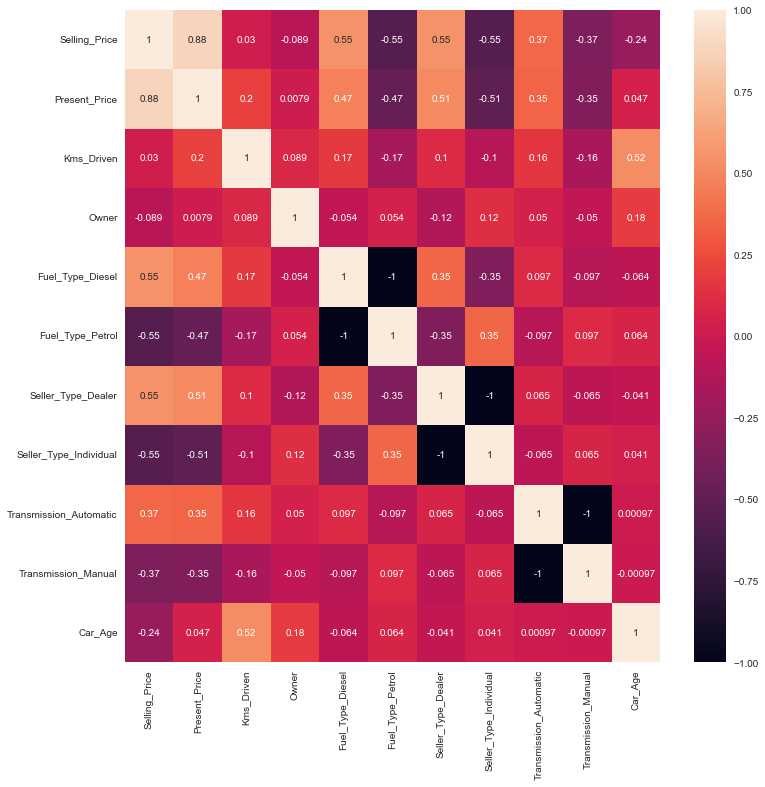

In [57]:
#check the correlation between the features
cmap = sns.diverging_palette(30, 230, 90, 20, as_cmap=True)
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)
sns.set(font_scale=1)

### categorial features correlations:

C:\Users\divak\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:1296: UserWarning: 6.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\divak\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:1296: UserWarning: 14.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\divak\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:1296: UserWarning: 9.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Owner', ylabel='Selling_Price'>

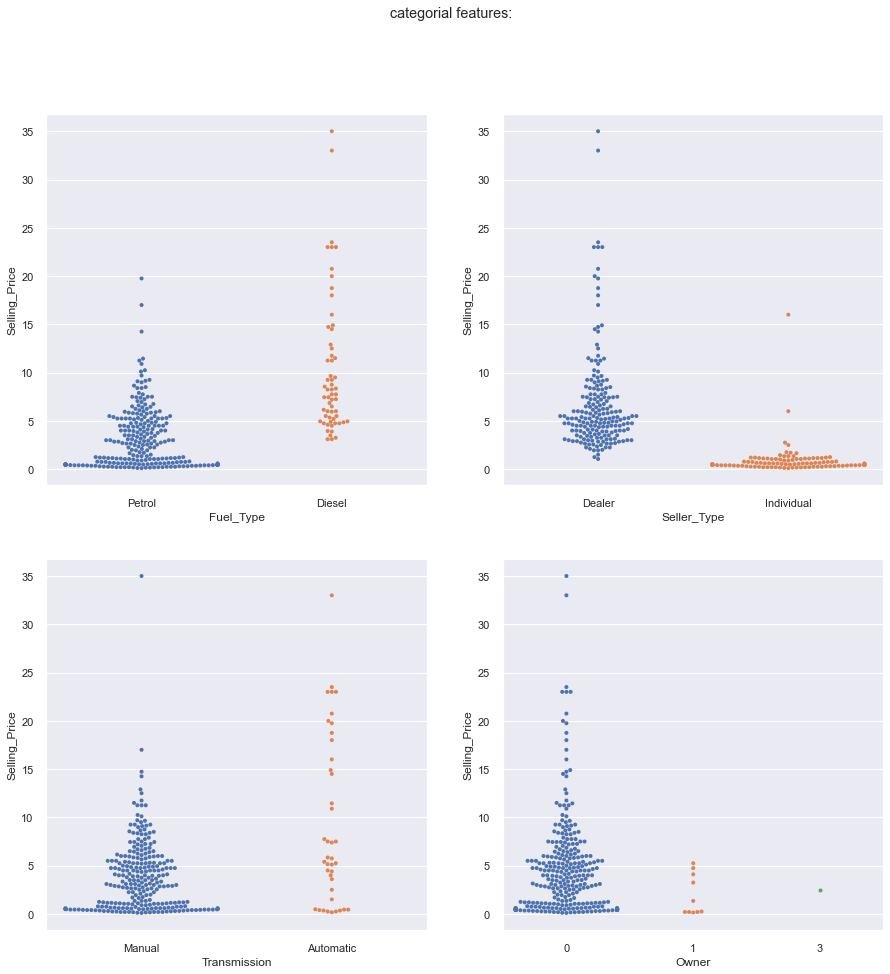

In [58]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('categorial features:')

sns.swarmplot(ax=axes[0,0], x="Fuel_Type", y="Selling_Price", data=df_copy,marker='o',size=4)
sns.swarmplot(ax=axes[0,1], x="Seller_Type", y="Selling_Price", data=df_copy,marker='o',size=4)
sns.swarmplot(ax=axes[1,0], x="Transmission", y="Selling_Price", data=df_copy,marker='o',size=4)
sns.swarmplot(ax=axes[1,1], x="Owner", y="Selling_Price", data=df_copy,marker='o',size=4)

All the higher Priced cars are usually of Automatic Transmission type

Not to Anyone's surprise, resold cars cost way lower than new ones

In [59]:
print(df_copy.Selling_Price[df_copy.Fuel_Type == 'Diesel'].mean())
print(df_copy.Selling_Price[df_copy.Fuel_Type == 'Petrol'].mean())


10.278500000000001
3.26418410041841


Diesel cars usually sell at ahigher Price than Petrol cars

In [60]:
print(df_copy.Selling_Price[df_copy.Seller_Type == 'Dealer'].mean())
print(df_copy.Selling_Price[df_copy.Seller_Type == 'Individual'].mean())


6.759222797927461
0.870943396226415


Individual Sellers sell cars at a lower price than Dealers whic could be due to Individual Sellers selling only Petrol cars which fare at a lower price

### numerical features correlations:

C:\Users\divak\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Selling Price range by Car Age')

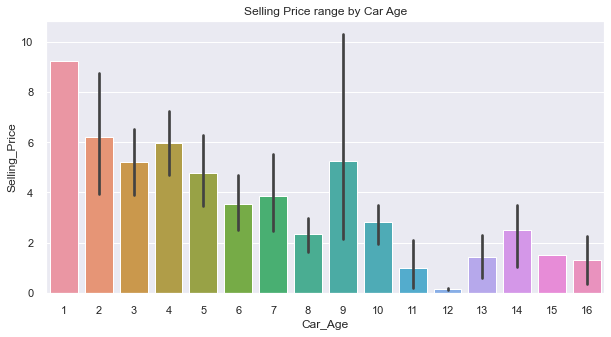

In [61]:
# bar plot for car age vs selling price(average)
fig = plt.figure(figsize=(10,5))
sns.barplot('Car_Age','Selling_Price',data=df).set_title('Selling Price range by Car Age')

**Implementing Models**

In [62]:
#split the data into train and test set in order to train and test the model
X = df.drop(columns=['Selling_Price'])
Y = df['Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state = 42)

In [64]:
# data scaling and normalization


scaler_MinMax = MinMaxScaler()


X_train_normalized = X_train.copy()
X_test_normalized = X_test.copy()

numerical_features = ['Present_Price', 'Kms_Driven', 'Owner', 'Car_Age']


# Normalization:
scaler_MinMax.fit(X_train[numerical_features])
X_train_normalized[numerical_features] = scaler_MinMax.transform(X_train_normalized[numerical_features])

# the scaling is with the the same fitted scaler (by the train data)
X_test_normalized[numerical_features] = scaler_MinMax.transform(X_test_normalized[numerical_features])


In [65]:
print('note: the min is 0 and max is 1')
indexes = [False, False, False, True, False, False, False, True]
X_train_normalized.describe()[numerical_features].iloc[indexes]

note: the min is 0 and max is 1


,Present_Price,Kms_Driven,Owner,Car_Age
min,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0


Linear-Regression Model 

In [67]:
reg1 = LinearRegression()

In [71]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [72]:
reg1.fit(X_train_normalized, y_train)

# Predicting the Test set results
y_pred = reg1.predict(X_test_normalized)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))


Mean Absolute Error: 1.5435701359976548
Mean Squared Error: 10.708956735703616
R2 Score: 0.6510336225152124


C:\Users\divak\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\divak\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


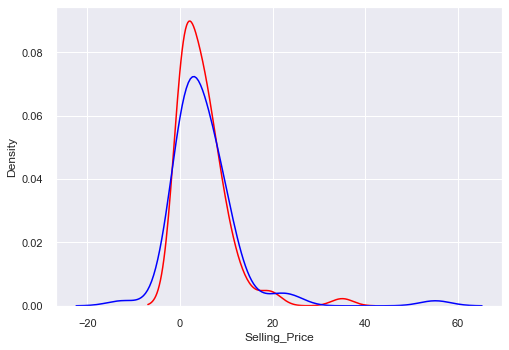

In [74]:

# Plotting the actual vs predicted values


ax = sns.distplot(y_test, hist=False, color="red", label="Actual Value")
sns.distplot(y_pred, hist=False, color="blue", label="Fitted Values" , ax=ax)


plt.show()

<br>
<br>
<br>

 Random Forest Regressor model 

In [75]:
reg2 = RandomForestRegressor()

In [77]:
reg2.fit(X_train_normalized, y_train)

# Predicting the Test set results
y_pred = reg2.predict(X_test_normalized)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))


Mean Absolute Error: 0.8668320000000009
Mean Squared Error: 5.214419909599999
R2 Score: 0.8300808125901811


C:\Users\divak\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\divak\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


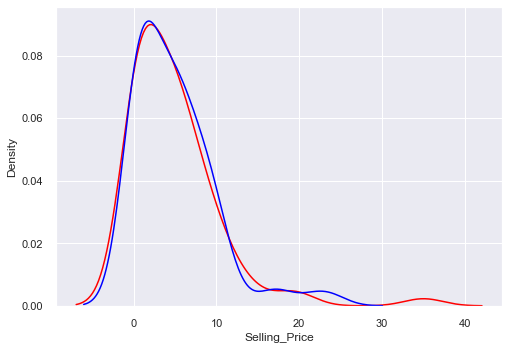

In [78]:
# Plotting the actual vs predicted values


ax = sns.distplot(y_test, hist=False, color="red", label="Actual Value")
sns.distplot(y_pred, hist=False, color="blue", label="Fitted Values" , ax=ax)


plt.show()

Tuning with RandomizedSearchCV

In [79]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [81]:
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg2, param_distributions = random_grid, n_iter = 100,  verbose=2, random_state=42, n_jobs = -1, scoring='r2')
# Fit the random search model
rf_random.fit(X_train_normalized, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='r2', verbose=2)

In [82]:
print("best R2 score is:")
print(rf_random.best_score_)

best R2 score is:
0.8992933780158487


In [83]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

Testing best parameters Random forest Regressor model:

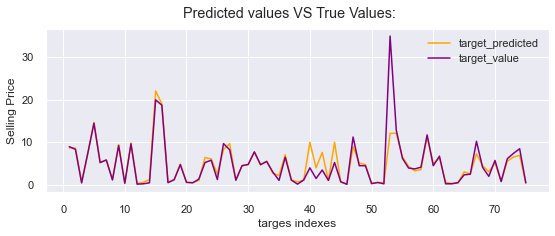

,R2_score,MAE score
test RFR model,0.720389,0.954415


In [84]:
rf = rf_random.best_estimator_
rf.fit(X_train_normalized, y_train)

R2_score = rf.score(X_test_normalized, y_test)
y_predict = rf.predict(X_test_normalized)
mae_score = MAE(y_test, y_predict)

indexes = list(range(1, len(y_predict)+1))
fig, axs = plt.subplots(1, 1, figsize=(9, 3), sharey=True)
axs.plot(indexes, y_predict, label='target_predicted', color='orange')
axs.plot(indexes, y_test, label='target_value', color='purple')
axs.legend()
axs.set_xlabel('targes indexes')
axs.set_ylabel('Selling Price')
fig.suptitle('Predicted values VS True Values:')
plt.show()

pd.DataFrame(index=['test RFR model'], data={'R2_score': R2_score, 'MAE score': mae_score}) 
